# Analiza knjig
V tej datoteki bom analizirala knjige, katerih podatke sem dobila na spletni strani Open Library.

Najprej si oglejmo vse knjige in njihove podatke.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
knjige = pd.read_csv("datoteka.csv")
knjige.index = knjige.index + 1
knjige["naslov"] = knjige["naslov"].str.replace("&#39;", "'")
knjige

,naslov,leto_izdaje,avtor,ocena,stevilo_ocen
1,I Don't Love You Anymore,2020,Rithvik Singh,3.16,75
2,Verity,2018,Colleen Hoover,3.94,93
3,"Thinking, fast and slow",2011,Daniel Kahneman,4.10,172
4,A Gentle Reminder,2020,Bianca Sparacino,3.94,118
5,A Good Girl's Guide to Murder,2019,Holly Jackson,4.14,80
...,...,...,...,...,...
980,The six pillars of self-esteem,1994,Nathaniel Branden,4.82,11
981,"Everything, Everything",2015,Nicola Yoon,4.28,29
982,Monster,1999,Walter Dean Myers,3.94,18
983,Memoirs of Sherlock Holmes [11 stories],1893,Arthur Conan Doyle,4.44,16


Bolj zanimivo bi si jih bilo ogledati razvrščene po oceni.

In [22]:
knjige_po_oceni = knjige.sort_values("ocena", ascending=False)
knjige_po_oceni

,naslov,leto_izdaje,avtor,ocena,stevilo_ocen
930,How To Talk To Anyone,2021,Steve Robinson,5.00,2
887,A Touch of Darkness,2019,Scarlett St. Clair,5.00,4
430,The encyclopedia Americana 1958- Antartic,1958,Americana Corporation,5.00,11
730,Dotcom Secrets,2015,Russell Brunson,5.00,3
714,The way of the superior man,1997,David Deida,5.00,7
...,...,...,...,...,...
735,Things Have Gotten Worse Since We Last Spoke,2021,Eric Larocca,2.88,8
934,"Good Vibes, Good Life",2020,Vex King,2.56,9
562,Everything I Know About Love,2018,Dolly Alderton,2.43,7
952,Without Merit,2017,Colleen Hoover,2.25,4


Opazimo, da so na vrhu samo knjige z najvišjo možno oceno 5.0, ocenilo pa jih je dokaj malo ljudi. Tudi na dnu so knjige z manjšim številom ocen, zato se raje omejimo na knjige, ki so dobile vsaj 100 ocen.

In [31]:
knjige[knjige.stevilo_ocen >= 100].sort_values("ocena", ascending=False)

,naslov,leto_izdaje,avtor,ocena,stevilo_ocen
143,Dog Man,2015,Dav Pilkey,4.59,107
438,The Way of Kings,2010,Brandon Sanderson,4.59,125
228,The Hitch Hiker's Guide to the Galaxy,1979,Douglas Adams,4.52,130
125,Cabin Fever,2007,Jeff Kinney,4.51,118
40,The Sea of Monsters,2005,Rick Riordan,4.49,138
...,...,...,...,...,...
175,Haunting Adeline,2021,H. D. Carlton,3.62,152
189,The Catcher in the Rye,1900,J. D. Salinger,3.60,322
611,The Man in the High Castle,1962,Philip K. Dick,3.56,105
272,Heart of Darkness,1899,Joseph Conrad,3.46,108


Zanima me, ali je na seznamu vseh knjig (razvrščenih po oceni) Harry Potter and the Philosopher's Stone, ki je ena izmed mojih najljubših knjig. Če je, si oglejmo njene podatke.

In [24]:
knjigice = knjige_po_oceni.reset_index(drop=True)
harry = knjigice.loc[knjigice["naslov"] == "Harry Potter and the Philosopher's Stone"]
harry

,naslov,leto_izdaje,avtor,ocena,stevilo_ocen
288,Harry Potter and the Philosopher's Stone,1997,J. K. Rowling,4.25,741


Harry Potter and the Philosopher's Stone je torej 288. najboljše ocenjena knjiga, kar ni ravno najboljše mesto. Poglejmo, kako so razvrščeni ostali deli iz zbirke Harry Potter.

In [35]:
vsi_harryji = knjigice[knjigice["naslov"].str.contains("Harry Potter")]
vsi_harryji

,naslov,leto_izdaje,avtor,ocena,stevilo_ocen
74,Harry Potter (series) 1-7,1999,J. K. Rowling,4.56,39
152,Harry Potter and the Half-Blood Prince,2005,J. K. Rowling,4.41,169
228,Harry Potter and the Order of the Phoenix,2003,J. K. Rowling,4.31,249
233,Harry Potter and the Goblet of Fire,1993,J. K. Rowling,4.31,245
240,Harry Potter and the Prisoner of Azkaban,1999,J. K. Rowling,4.30,516
251,Harry Potter and the Deathly Hallows,2007,J. K. Rowling,4.29,366
288,Harry Potter and the Philosopher's Stone,1997,J. K. Rowling,4.25,741
358,Harry Potter and the Chamber of Secrets,1998,J. K. Rowling,4.18,404
609,Harry Potter and the Cursed Child,2001,Jack Thorne,4.00,100


Najboljše ocenjena je kar cela zbirka, od posameznih delov pa je očitno najboljši Harry Potter and the Half-Blood Prince, najslabši pa Harry Potter and the Cursed Child, s čimer se popolnoma strinjam. Me pa preseneča, da je ta razlika tako velika.

Na seznamu knjig, ki imajo vsaj 100 ocen, ni veliko knjig z nizkimi ocenami, zato bi lahko preverili, ali obstaja kakšna povezava med oceno in številom ocen. Naša hipoteza je torej, da so knjige z večjim številom ocen boljše ocenjene. Na grafu bom uporabila logaritemsko skalo za y os, da se bo boljše videlo.

Text(0, 0.5, 'število ocen')

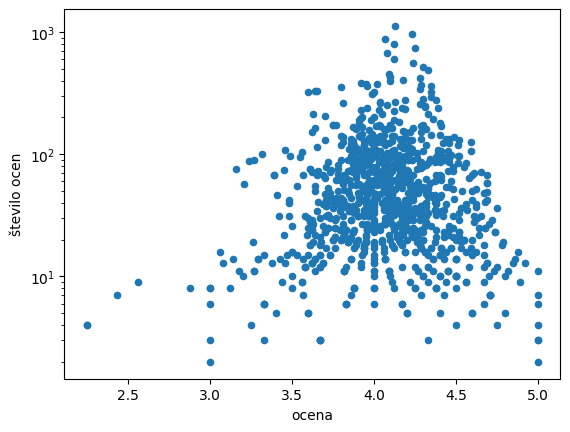

In [37]:
knjige.plot.scatter("ocena", "stevilo_ocen", logy=True)
plt.ylabel("število ocen")

Naša hipoteza ni bila pravilna. Na grafu je težko opaziti kakšno povezavo med oceno in številom ocen. Vidimo pa en krog podatkov okoli ocene 4 in števila ocen 70, kar sta najbrž najbolj pogosta podatka.

Kakšno je torej povprečno število ocen, ki ga dobi knjiga?

In [26]:
round(float(knjige["stevilo_ocen"].mean()),2)

69.21

Oglejmo si še, koliko knjig ima kakšno oceno.

Text(0, 0.5, 'število')

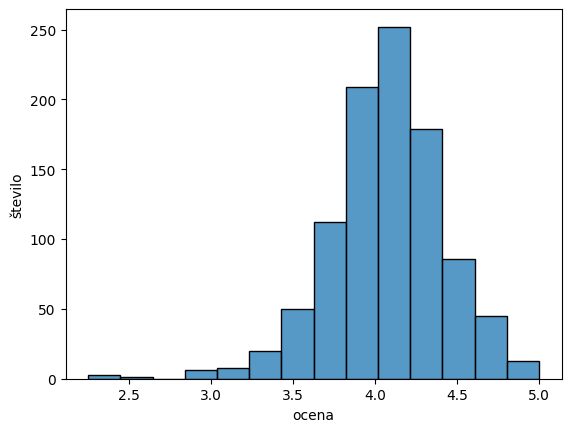

In [46]:
sns.histplot(knjige, x="ocena", binwidth=0.2)
plt.ylabel("število")

Na spletni strani je torej največ takih knjig, ki imajo oceno okoli 4.2. To je čisto smiselno, saj je njihov namen imeti tu zbrane vse knjige, začeli pa so z najbolj priljubljenimi. 

Zanimivo bi bilo tudi vedeti, katerega leta so bile te knjige izdane.

Text(0, 0.5, 'število')

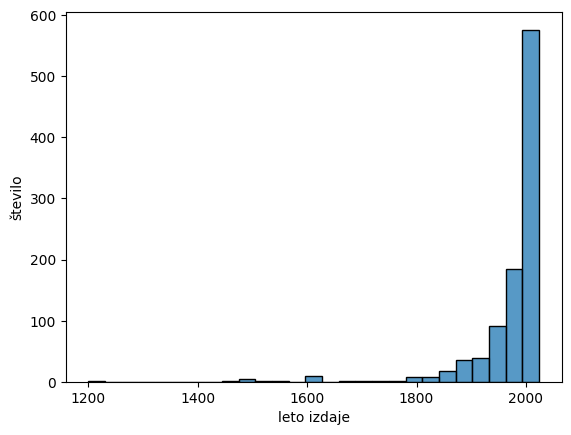

In [51]:
sns.histplot(knjige, x="leto_izdaje", binwidth=30)
plt.xlabel("leto izdaje")
plt.ylabel("število")

Poglejmo bolj od blizu to desno stran grafa z dodatno omejitvijo, da je knjiga izdana po letu 1800.

Text(0, 0.5, 'število')

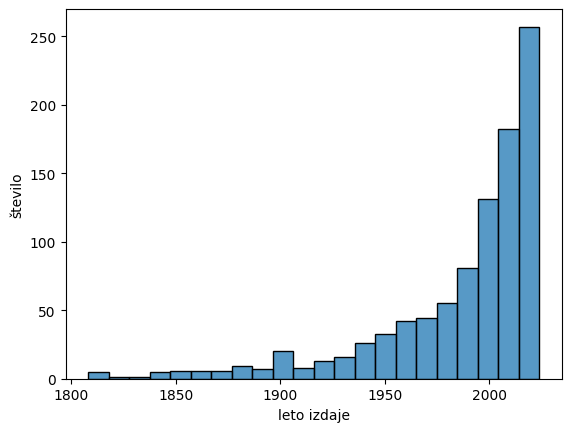

In [53]:
sns.histplot(knjige[knjige.leto_izdaje > 1800], x="leto_izdaje", binwidth=10)
plt.xlabel("leto izdaje")
plt.ylabel("število")

Izgleda, kot da je vsako naslednje leto izdano več knjig (z izjemo vrha okoli 1900).

Poglejmo, kako se povprečne ocene spreminjajo glede na leto izdaje. Prikazala bom le knjige od leta 1970 naprej.

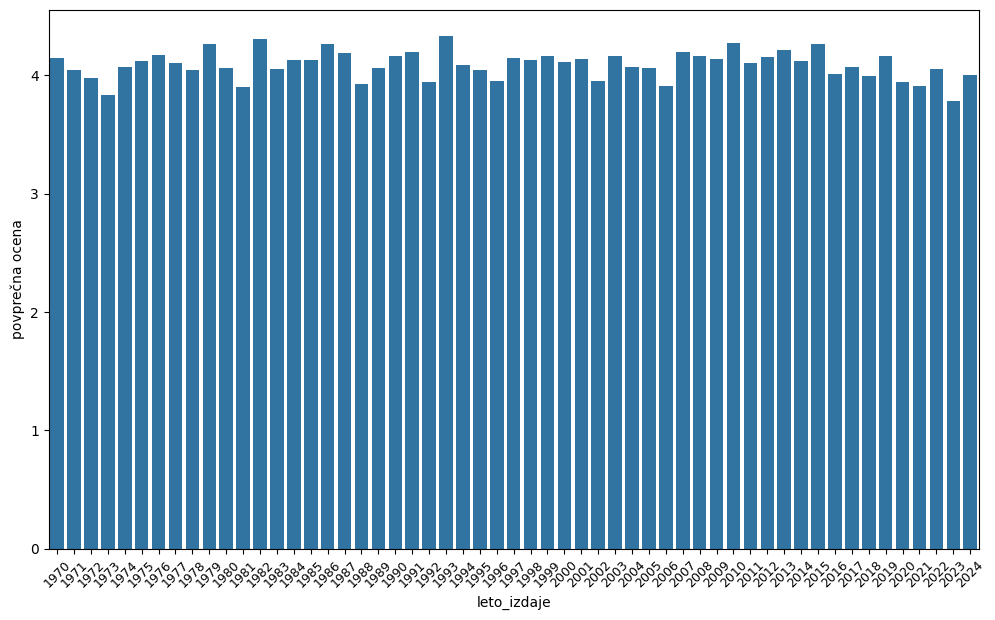

In [65]:
najnovejse_knjige = knjige[knjige["leto_izdaje"] >= 1970]
povprecna_ocena_po_letih = najnovejse_knjige.groupby("leto_izdaje")["ocena"].mean().reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(povprecna_ocena_po_letih, x="leto_izdaje", y="ocena")
plt.ylabel("povprečna ocena")
plt.xticks(rotation=45, fontsize=9)
plt.show()

Za konec si še oglejmo kaj o avtorjih, npr. kateri avtorji so napisali več knjig, ki so tukaj zbrane.

In [68]:
stevilo_knjig_avtorja = knjige.groupby("avtor").size().reset_index(name="število_knjig")
avtor_z_vec_knjigami = stevilo_knjig_avtorja[stevilo_knjig_avtorja["število_knjig"] > 1]
avtor_z_vec_knjigami.sort_values("število_knjig", ascending=False)

,avtor,število_knjig
528,Stephen King,32
472,Rick Riordan,18
115,Colleen Hoover,17
264,Jeff Kinney,16
502,Sarah J. Maas,9
...,...,...
578,Viktor E. Frankl,2
604,Όμηρος (Homer),2
606,Лев Толстой,2
608,Фёдор Михайлович Достоевский,2


Stephen King je torej zelo popularen, saj je tukaj kar 32 njegovih knjig.